In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# 1 tensorflow v2.xx에서 v1 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # tensorflow V2 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor 객체의 흐름)을 사용하는 수치 계산 라이브러리
- 그래프는 node(연산)와 edge로 구성
- sess = tf.Session()을 이용해서 실행 환경
- sess.run()을 통해서 실행 결과를 확인

In [6]:
# 1단계 : tensor(상수 노드 하나) 정의
node1 = tf.constant('Hello, Tensorflow')
# 2단계 : 세션(연산을 실행하는 환경) 생성
sess = tf.Session()
# 3단계 : 실제 실행 및 출력
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [8]:
# 간단한 연산 tensor 그래프
# 1. 그래프 정의
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
# 2. 세션 생성
sess = tf.Session()
# 3. 세션 실행 & 결과 
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [9]:
# 타입변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]


In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
print(sess.run(m))

2.5


In [14]:
# tf.random_normal([size]) : 평균이 0이고 표준편차가 1인 난수 size개 발생
w = tf.random_normal([3]) 
sess = tf.Session()
sess.run(w)

array([0.13804592, 2.6595354 , 0.89550036], dtype=float32)

In [15]:
#  변수 노드
w = tf.Variable(tf.random_normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화
sess.run(w)

array([1.289432], dtype=float32)

# 2 tensorflow v1을 이용한 회귀분석 구현
## 2.1 독립변수 x가 1개, 타겟(종속)변수 y가 1개

In [19]:
# tensor 그래프 정의
# 데이터 셋 확보
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis : 결과는 numpy 배열
H = W * x + b
# cost function (손실함수 : mse )
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 0이 되는 방향
(경사하강법GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2 에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:4.946615219116211, W:[0.5018766], b:[0.0583527]
300번째 cost:0.01246507465839386, W:[1.1293594], b:[0.7059356]
600번째 cost:0.0029412659350782633, W:[1.0628375], b:[0.8571561]
900번째 cost:0.000694012560416013, W:[1.0305235], b:[0.9306128]
1200번째 cost:0.00016376013809349388, W:[1.014827], b:[0.96629465]
1500번째 cost:3.864014433929697e-05, W:[1.0072023], b:[0.98362744]
1800번째 cost:9.118695743381977e-06, W:[1.0034988], b:[0.99204654]
2100번째 cost:2.151853095710976e-06, W:[1.0016997], b:[0.9961363]
2400번째 cost:5.082827669866674e-07, W:[1.0008261], b:[0.99812216]
2700번째 cost:1.203392372417511e-07, W:[1.0004023], b:[0.9990864]
3000번째 cost:2.861401604548064e-08, W:[1.0001963], b:[0.9995545]
3300번째 cost:6.845125799515017e-09, W:[1.0000961], b:[0.9997822]
3600번째 cost:1.6838015426401398e-09, W:[1.0000474], b:[0.99989176]
3900번째 cost:3.949859606056094e-10, W:[1.000023], b:[0.99994767]
4200번째 cost:1.1486515211212023e-10, W:[1.0000126], b:[0.99997187]
4500번째 cost:5.328478283606053e-11, W:[1.00000

In [21]:
# 최종적으로 나온 회귀식 H = W*x + b
W_, b_ = sess.run([W, b])

In [22]:
W_, b_

(array([1.0000087], dtype=float32), array([0.9999811], dtype=float32))

In [23]:
def predict(x):
    return W_[0] * x + b_[0]

In [24]:
predict(5)

6.000024616718292

## 2.2 predict을 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [30]:
x = tf.placeholder(dtype=tf.float32)
H = 1*x + 1
sess = tf.Session()
sess.run([x, H], feed_dict={x : np.array([40,50])})

[array([40., 50.], dtype=float32), array([41., 51.], dtype=float32)]

In [31]:
# tensor 그래프 정의
# 데이터 셋 확보
x_data = np.array([1,2,3])
y_data = np.array([2,3,4])
# placeholder 설정(x, y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis : 결과는 numpy 배열
H = W * x + b
# cost function (손실함수 : mse )
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 0이 되는 방향
(경사하강법GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2 에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data,
                                                   y:y_data})
    if step%300==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:12.582934379577637, W:[-0.8103775], b:[1.8251091]
300번째 cost:0.06278061866760254, W:[0.7096891], b:[1.6599452]
600번째 cost:0.014813718385994434, W:[0.8589793], b:[1.3205731]
900번째 cost:0.0034954408183693886, W:[0.9314983], b:[1.1557205]
1200번째 cost:0.0008247688529081643, W:[0.966725], b:[1.0756418]
1500번째 cost:0.00019460899056866765, W:[0.98383653], b:[1.0367433]
1800번째 cost:4.591904871631414e-05, W:[0.9921485], b:[1.0178481]
2100번째 cost:1.0835545253939927e-05, W:[0.99618596], b:[1.0086701]
2400번째 cost:2.557284460635856e-06, W:[0.9981471], b:[1.004212]
2700번째 cost:6.035713226992812e-07, W:[0.99909985], b:[1.0020463]
3000번째 cost:1.4271292059220286e-07, W:[0.9995623], b:[1.0009949]
3300번째 cost:3.386314162412418e-08, W:[0.99978685], b:[1.0004847]
3600번째 cost:8.115894623017539e-09, W:[0.99989545], b:[1.0002373]
3900번째 cost:1.9807468998322975e-09, W:[0.9999487], b:[1.0001175]
4200번째 cost:5.271469372125637e-10, W:[0.99997365], b:[1.0000607]
4500번째 cost:9.331794365019519e-11, W:[0.999

In [34]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([5.9999704], dtype=float32)

## 2.3 scale이 다른 데이터들의 회귀분석 구현(scale 조정X)

In [39]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W * x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)
# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x:x_data, y:y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step+1, cost_val))

301/6000번째 cost:119.46598815917969
601/6000번째 cost:79.5013198852539
901/6000번째 cost:79.15812683105469
1201/6000번째 cost:79.15463256835938
1501/6000번째 cost:79.15406799316406
1801/6000번째 cost:79.153564453125
2101/6000번째 cost:79.153076171875
2401/6000번째 cost:79.152587890625
2701/6000번째 cost:79.152099609375
3001/6000번째 cost:79.15169525146484
3301/6000번째 cost:79.15122985839844
3601/6000번째 cost:79.15083312988281
3901/6000번째 cost:79.15043640136719
4201/6000번째 cost:79.15003967285156
4501/6000번째 cost:79.14967346191406
4801/6000번째 cost:79.14929962158203
5101/6000번째 cost:79.14897155761719
5401/6000번째 cost:79.14863586425781
5701/6000번째 cost:79.14830017089844
6001/6000번째 cost:79.14799499511719


## 2.4 scale이 다른 데이터들의 회귀분석 구현(scale 조정O)
### scale 조정방법 : 모든 데이터를 일정범위내로 조정
- normalization(정규화) : 모든 데이터를 0~1 사이로 조정
                      X - Xmin
   normalization = ─────────────
                    Xmax - Xmin
       * 위의 식보다 라이브러리 추천(sklearn.preprocessing.MinMaxScaler)
- standarization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                        X - Xmean
   standarization = ─────────────────
                      Xstd(표준편차)
       * 위의 식보다 라이브러리 추천(sklearn.preprocessing.StandardScaler)

In [47]:
# 라이브러리 쓰지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# x_data.min(), x_data.max(), x_data.mean(), x_data.std()
norm_scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
norm_scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())

array([0.        , 0.11111111, 0.7       , 0.83333333, 1.        ])

In [4]:
# 라이브러리를 사용하여 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # 독립변수 x를 정규화시킬 객체
scaler_x.fit(x_data)
norm_scaled_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler() # 종속(타겟)변수 y를 정규화시킬 객체
norm_scaled_y_data = scaler_y.fit_transform(y_data)
norm_scaled_y_data

array([[0.        ],
       [0.11111111],
       [0.7       ],
       [0.83333333],
       [1.        ]])

In [55]:
# 라이브러리 쓰지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
stan_scaled_x_data = (x_data - x_data.mean()) / x_data.std()
stan_scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([x_data, norm_scaled_x_data, stan_scaled_x_data])

array([[ 1.        ,  0.        , -1.22474487],
       [ 2.        ,  0.11111111, -0.93313895],
       [ 5.        ,  0.44444444, -0.05832118],
       [ 8.        ,  0.77777778,  0.81649658],
       [10.        ,  1.        ,  1.39970842]])

In [56]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [58]:
# 라이브러리를 사용하여 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
stan_scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
stan_scaled_y_data = scaler_y.fit_transform(y_data)

In [60]:
# 스케일 조정된 데이터를 다시 복구 : inverse_transform() 이용
scaler_y.inverse_transform(stan_scaled_y_data)

array([[ 5.],
       [15.],
       [68.],
       [80.],
       [95.]])

In [6]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W * x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x:norm_scaled_x_data, 
                                                     y:norm_scaled_y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step, cost_val))

300/6000번째 cost:0.014325168915092945
600/6000번째 cost:0.010894278064370155
900/6000번째 cost:0.010047664865851402
1200/6000번째 cost:0.009838744066655636
1500/6000번째 cost:0.009787186980247498
1800/6000번째 cost:0.009774469770491123
2100/6000번째 cost:0.009771332144737244
2400/6000번째 cost:0.009770556353032589
2700/6000번째 cost:0.009770363569259644
3000/6000번째 cost:0.009770320728421211
3300/6000번째 cost:0.009770308621227741
3600/6000번째 cost:0.009770304895937443
3900/6000번째 cost:0.009770301170647144
4200/6000번째 cost:0.009770303964614868
4500/6000번째 cost:0.009770305827260017
4800/6000번째 cost:0.009770305827260017
5100/6000번째 cost:0.009770305827260017
5400/6000번째 cost:0.009770305827260017
5700/6000번째 cost:0.009770305827260017
6000/6000번째 cost:0.009770305827260017


## 2.5 독립변수 x가 3개, 타겟(종속)변수 y가 1개
- 교안 28p.

In [32]:
# data set
x_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열, 예측시 ?행3열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([[152],  # 학습시에는 y에 5행1열, 예측시 ?행1열
                   [185],
                   [180],
                   [196],
                   [142]])
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:x_data[0:1, ]})
# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
#H = X  @ W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=2e-5).minimize(cost)
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict={X: x_data,
                                                    y:y_data})
    if step%5000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 43570.3359375
5001번째 cost : 3.6688766479492188
10001번째 cost : 2.3057525157928467
15001번째 cost : 1.47402024269104
20001번째 cost : 0.9620341062545776
25001번째 cost : 0.6468642950057983
30001번째 cost : 0.45283666253089905
35001번째 cost : 0.33337849378585815
최종 cost : 0.2598476707935333


In [33]:
# 예측
input_data = np.array([[73, 80, 77],
                       [73, 80, 72]])
sess.run(H, feed_dict={X:input_data})

array([[152.76846],
       [149.01736]], dtype=float32)

In [35]:
input_data = np.array([[73, 80, 77]])
sess.run(H, feed_dict={X: input_data})

array([[152.76846]], dtype=float32)

In [37]:
# 스케일 조정 후 학습하고 예측하기
from sklearn.preprocessing import StandardScaler
x_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열, 예측시 ?행3열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([[152], [185], [180], [196], [142]])
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([scaled_x_data, scaled_y_data])

array([[-1.19344226, -0.42020085, -0.93897274, -0.92622337],
       [ 0.82934123,  0.31058324,  0.65550927,  0.68248038],
       [ 0.42478453,  0.58462728,  0.38976227,  0.43873739],
       [ 1.13275875,  1.22406336,  1.27558561,  1.21871496],
       [-1.19344226, -1.69907302, -1.38188441, -1.41370936]])

In [41]:
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:x_data[0:1, ]})
# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
#H = X  @ W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=2e-2).minimize(cost)
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X: scaled_x_data,
                                                    y: scaled_y_data})
    if step%2000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 1.1984202861785889
2001번째 cost : 0.007123095449060202
4001번째 cost : 0.005039928015321493
6001번째 cost : 0.0035879691131412983
8001번째 cost : 0.0025759446434676647
10001번째 cost : 0.0018705509137362242
12001번째 cost : 0.001378896413370967
14001번째 cost : 0.0010362183675169945
16001번째 cost : 0.0007973684114404023
18001번째 cost : 0.0006308936863206327
최종 cost : 0.000514910148922354


In [45]:
# 예측
input_data = np.array([[73, 80, 77],
                       [73, 80, 72]])
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[152.1517 ]
 [150.86345]]


In [47]:
# 예측
input_data = np.array([[73, 80, 77]])
hat = sess.run(H, feed_dict={X: scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[152.1517]]


# 3. Logistic regression == Binary classification
- 로지스틱 회귀분석 = 이진분류분석
- 기존의 회귀분석과 다른 처리가 필요(loss function, H)

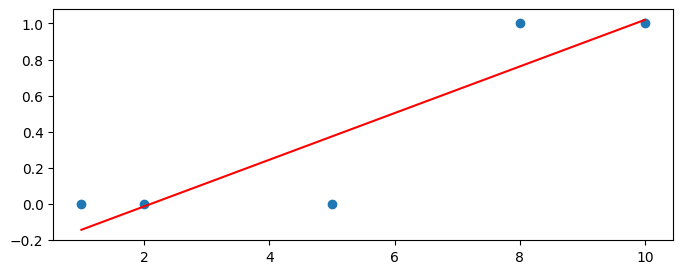

In [5]:
# 교안 35p.
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
lm = stats.linregress(x, y) # 기울기(weight, slope)와 절편(bias, intercept)
lm[0], lm[1] # W와 bias
H = lm[0] * x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

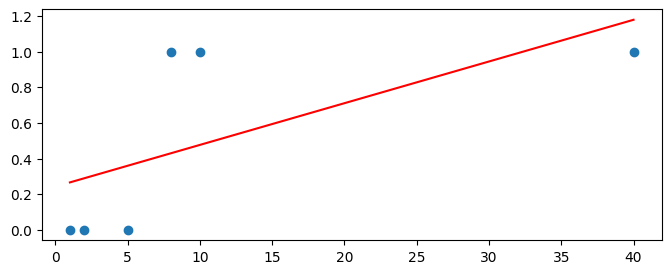

In [55]:
plt.figure(figsize=(8, 3))
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값
lm = stats.linregress(x, y) # 기울기(weight, slope)와 절편(bias, intercept)
lm[0], lm[1] # W와 bias
H = lm[0] * x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

In [28]:
# 교안 46p
x_data = np.array([[10, 0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],[1], [1], [1], [0], [0], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립(입력)변수 2개 -> 타겟(출력)변수 1개인 weight & bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@W +b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H - y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행 안 됨 그래서 loss fucntion을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:2.067767858505249
1001번째 cost:0.15222036838531494
2001번째 cost:0.10711885988712311
3001번째 cost:0.08199061453342438
4001번째 cost:0.06599564105272293
5001번째 cost:0.055025458335876465
6001번째 cost:0.047084204852581024
7001번째 cost:0.041093382984399796
8001번째 cost:0.03642495721578598
9001번째 cost:0.032691001892089844
최종 cost : 0.029642839


In [36]:
# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 100.0 %


# 4. XOR 
- 교안 62

In [39]:
# data set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0], 
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 입력 2개 => 출력 1개인 W & b
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@W +b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H - y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행 안 됨 그래서 loss fucntion을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:0.7442952394485474
1001번째 cost:0.6931508779525757
2001번째 cost:0.6931471824645996
3001번째 cost:0.6931471824645996
4001번째 cost:0.6931471824645996
5001번째 cost:0.6931471824645996
최종 cost : 0.6931472


In [40]:
# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 75.0 %


# 5. Deep Learning : XOR
- X2 => 4 => 1

In [47]:
# data set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0], 
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : 입력2 -> 출력 4인 W & b
W1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.random_normal([4]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
# layer2 : 입력 4 -> 출력 1인 W & b
W2 = tf.Variable(tf.random_normal([4, 1]))
b2 = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%1000==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:0.6605060696601868
1001번째 cost:0.42777279019355774
2001번째 cost:0.381319522857666
3001번째 cost:0.3665987551212311
4001번째 cost:0.36000698804855347
5001번째 cost:0.356391966342926
6001번째 cost:0.35419031977653503
7001번째 cost:0.3527333736419678
8001번째 cost:0.3517126739025116
9001번째 cost:0.35096412897109985
최종 cost : 0.3503995


In [48]:
# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 75.0 %


## layer층을 X2 => 10 => 20 => 10 => y1
                    입력층   hideen layers   출력층

In [49]:
# data set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0], 
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1 : 입력2 -> 출력 10인 W & b
W1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : 입력 10 -> 출력 20인 W & b
W2 = tf.Variable(tf.random_normal([10, 20]))
b2 = tf.Variable(tf.random_normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

#layer3 : 입력20 -> 출력 10인 W&b
W3 = tf.Variable(tf.random_normal([20, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4 : 입력 10 -> 출력1인 W&b
W4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 301):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    y:y_data})
    if step%100==1:
        print("{}번째 cost:{}".format(step, cost_val))
print('최종 cost :', cost_val)

1번째 cost:4.610290050506592
101번째 cost:0.10217364132404327
201번째 cost:0.05873265862464905
최종 cost : 0.040666886


In [50]:
# accuracy ( 정확도 : 얼마나 맞췄는지 % )
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 100.0 %


In [53]:
# 예측
sess.run(H, feed_dict={X: np.array([[0,0]])})

array([[0.00333832]], dtype=float32)